In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
project_path = "/content/drive/My Drive/data_science/computer_vision/session13_assignment_yolo_opencv"
yolov3_weights = "./yolov3.weights"
yolov3_cfg = "./yolov3.cfg"
class_names = "./coco.names"
image_paths = ['p_d.jpeg','dog_bike_car.jpg','DSC_0841.JPG','DSC_0843.JPG','DSC_0844.JPG','DSC_0845.JPG','DSC_0846.JPG', 'DSC_0849.JPG','DSC_0850.JPG','DSC_0851.JPG']

In [3]:
 import os
 os.chdir(project_path)

In [4]:
# # Download code
# !wget https://pysource.com/wp-content/uploads/2019/06/yolo_object_detection.zip
# !unzip yolo_object_detection.zip
# !rm -r *.py *.zip *.jpg

In [5]:
# # Download weights
# !wget https://pjreddie.com/media/files/yolov3.weights

In [6]:
# !wget https://djl.ai/examples/src/test/resources/dog_bike_car.jpg
# !wget https://images.unsplash.com/photo-1601328318547-44567d853f3b?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&w=1000&q=80

In [7]:
# Load Yolo
def load_yolo(yolov3_weights, yolov3_cfg, class_names):
  net = cv2.dnn.readNet(yolov3_weights, yolov3_cfg)
  classes = []
  with open(class_names, "r") as f:
      classes = [line.strip() for line in f.readlines()]
  layer_names = net.getLayerNames()
  output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
  colors = np.random.uniform(0, 255, size=(len(classes), 3))
  return net, output_layers, classes, colors

In [8]:
# Loading images
def load_images(image_paths):
  images_loaded = {}
  for img in image_paths:
    current_img = cv2.imread(img)
    current_img = cv2.resize(current_img, None, fx=0.1, fy=0.1)
    # current_img = cv2.resize(current_img, (416,416))
    height, width, channels = current_img.shape
    images_loaded[img]=[current_img, height, width, channels]
  return images_loaded
  

In [9]:
# Detecting objects
def detect_objects(images_loaded, net):
  outs_list = []
  for img in images_loaded:
    blob = cv2.dnn.blobFromImage(images_loaded[img][0], 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs_list.append([net.forward(output_layers),images_loaded[img][1],images_loaded[img][2], images_loaded[img][0]])
  return outs_list

In [10]:
# Showing informations on the screen
def display_results(outs_list):
  for i, outs in enumerate(outs_list):
    class_ids = []
    confidences = []
    boxes = []
    for out in outs[0]:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0:
                # Object detected
                center_x = int(detection[0] * outs[2])
                center_y = int(detection[1] * outs[1])
                w = int(detection[2] * outs[2])
                h = int(detection[3] * outs[1])
                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    # Apply Non-Maximum Suppression
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0, 0.4)
    font = cv2.FONT_HERSHEY_COMPLEX_SMALL
    # font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = "{0:0.1f}".format(confidences[i]*100)
            color = colors[i]
            cv2.rectangle(outs[-1], (x, y), (x + w, y + h), color, 2)
            cv2.putText(outs[-1], label+" "+confidence, (x, y - 10), font, 0.7, color, 1)
            print(f'{label} - {confidence}')
    cv2_imshow(outs[-1])
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.imwrite(f'Detected{i}.jpg', outs[-1])


In [11]:
net, output_layers, classes, colors = load_yolo(yolov3_weights=yolov3_weights, yolov3_cfg=yolov3_cfg, class_names=class_names)

In [12]:
images_loaded = load_images(image_paths=image_paths)

In [13]:
outs_list = detect_objects(images_loaded=images_loaded, net=net)

dog - 91.6


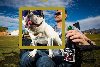

truck - 57.3
dog - 93.4


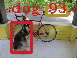

person - 100.0
laptop - 99.3


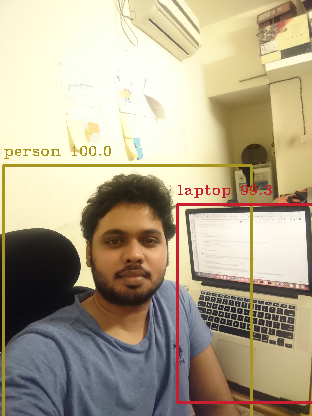

laptop - 95.6
bottle - 73.2
book - 24.5
mouse - 66.5
cell phone - 24.5


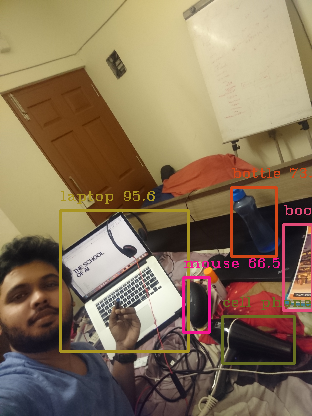

person - 100.0
remote - 63.0


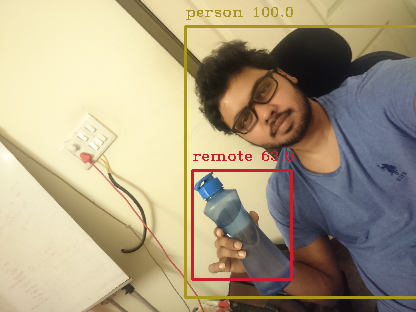

bottle - 68.3
person - 99.9


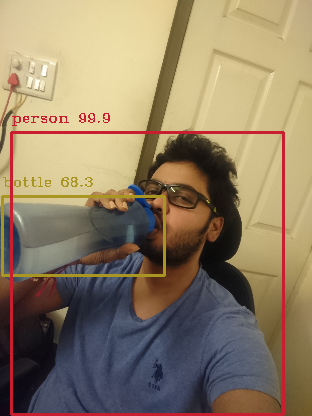

person - 99.9
chair - 50.8


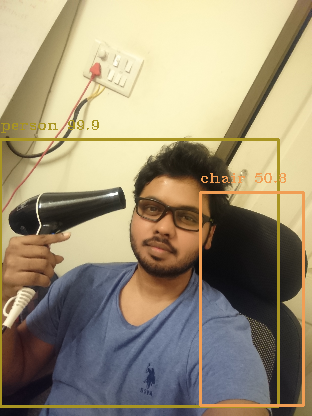

laptop - 97.8
person - 99.5
cell phone - 25.9


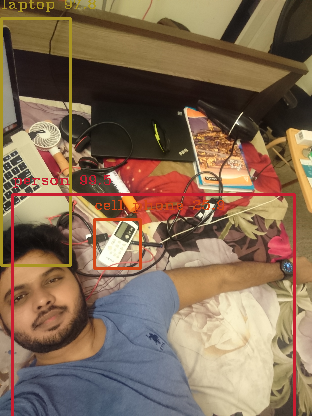

laptop - 99.8
book - 34.9


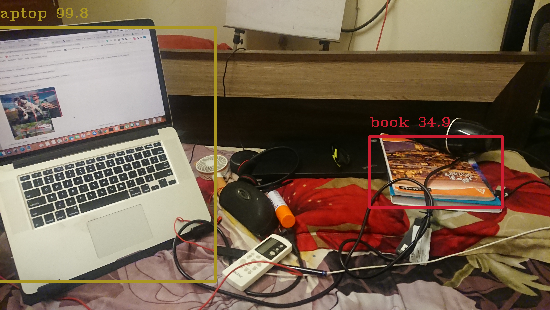

laptop - 99.6
bottle - 98.1


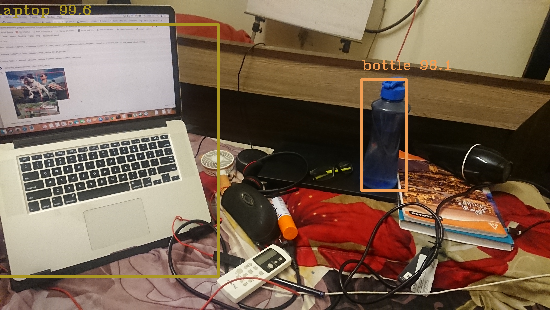

In [14]:
display_results(outs_list=outs_list)